In [ ]:
# General tools 
import pandas as pd
import numpy as np

# Plotting / viz 
import matplotlib.pyplot as plt

# Specialized packages 
from sklearn.decomposition import PCA     # viz n dimensions in 2d
from IPython.display import clear_output  # clearing graph output 

In [ ]:
# Create dataframe 
df = pd.read_csv('unga4691_cleaned.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'country_code', 'name', 'agreements_w_usa',
       'pct_agreement_w_usa', 'agreements_w_china', 'pct_agreement_w_china',
       'agreements_w_cccp', 'pct_agreement_w_cccp'],
      dtype='object')

In [ ]:
# Drop unnamed column 
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
# Features for k-means
features = ['pct_agreement_w_usa',
                'pct_agreement_w_china',
                'pct_agreement_w_cccp']

In [9]:
# Drop NaN values for k-means and create a features df
df = df.dropna(subset=features)
data = df[features].copy()

In [10]:
# Data is on a percentage scale, scaling would be unecessary 
# Creating random centriod positions 
def random_centroids (data, k): 
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) # random sample from data as float
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) 

In [11]:
# defining k = 4
centroids = random_centroids(data, 3)

/var/folders/vy/kdp_qm9n34jdpdmqk1dtnc100000gn/T/ipykernel_61774/279356044.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample())) # random sample from data as float


In [12]:
# DataFrame of random centroids
centroids

,0,1,2
pct_agreement_w_usa,40.09,32.31,39.05
pct_agreement_w_china,75.26,42.67,69.91
pct_agreement_w_cccp,76.83,71.77,77.96


In [13]:
# Finding distance between each datapoint and the centroids 
def get_labels (data, centroids): 
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [14]:
# Calling function to get initial labels for clusters 
lables = get_labels(data, centroids)

In [15]:
# value counts for each cluster 
lables.value_counts()

2    69
0    66
1    36
Name: count, dtype: int64

In [16]:
# Updating centroids based on cluster position 
# Calc geom mean to get new cluster centers 
def new_centroids (data, lables, k): 
    return data.groupby(lables).apply(
        lambda x: np.exp(np.log(x).mean())).T

In [17]:
# Plotting cluster assignments at each iteration of centroid repositioning 

def plot_clusters (data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

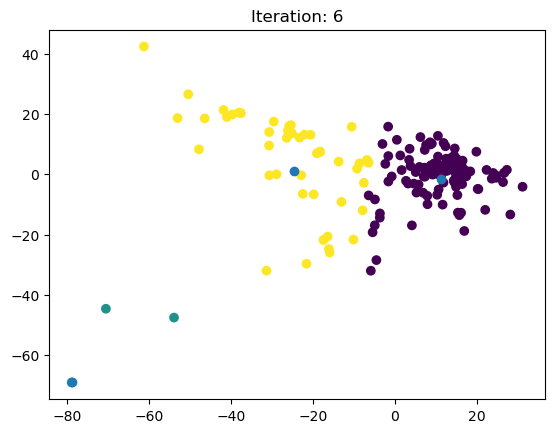

In [18]:
# Iteration loop 
max_iterations = 100 
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
# View centroids
centroids

,0,1,2
pct_agreement_w_usa,35.606434,0.0,49.364526
pct_agreement_w_china,72.990756,0.0,53.095824
pct_agreement_w_cccp,78.560963,0.0,51.987199


In [ ]:
# View cluster 0
df[labels==0][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_cccp
0,AFGHANISTAN,35.12,71.28,84.64
1,ANGOLA,17.42,72.49,78.99
2,ALBANIA,14.80,61.22,58.13
3,UNITED ARAB EMIRATES,35.93,77.36,83.59
4,ARGENTINA,47.41,73.82,78.05
...,...,...,...,...
165,YEMEN,32.49,70.45,78.46
166,DEMOCRATIC YEMEN,29.76,75.03,86.46
167,YUGOSLAVIA,39.84,74.51,86.14
169,ZAMBIA,36.74,76.86,83.47


In [ ]:
# View cluster 1
df[labels==1][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_cccp
42,DOMINICA,12.37,24.12,19.91
47,ZANZIBAR,0.00,0.00,0.00
168,UNION OF SOUTH AFRICA,20.23,17.57,6.17


In [ ]:
# View cluster 2
df[labels==2][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_cccp
6,AUSTRALIA,63.60,55.46,54.56
7,AUSTRIA,59.48,54.30,57.00
9,BELGIUM,73.95,46.73,44.17
17,BELIZE,22.09,52.31,52.54
25,CANADA,71.85,50.16,45.67
33,COMOROS,23.04,58.60,56.10
35,COSTA RICA,47.10,65.58,65.16
40,GERMANY,62.71,51.16,56.92
43,DENMARK,66.43,53.35,52.25
44,DOMINICAN REPUBLIC,47.00,65.77,64.80


In [ ]:
# # New DataFrames of name, code and feature 
cl0 = df[labels==0][['name', 'country_code']+ features]
cl1 = df[labels==1][['name', 'country_code']+ features]
cl2 = df[labels==2][['name', 'country_code']+ features]

In [ ]:
# Add cluster column to each DataFrame
cl0['cluster'] = 0
cl1['cluster'] = 1
cl2['cluster'] = 2

In [ ]:
# Concatenate clustered data
df_clustered = pd.concat([cl0, cl1, cl2])

In [ ]:
# Add period column to DataFrame
df_clustered['period'] = '1946-1991'

In [ ]:
# Save DataFrame to csv
df_clustered.to_csv('unga4691_clustered.csv')